In [342]:
import os, glob
import pandas as pd

In [343]:
# 合併檔案
def conbine_data(old_file, filename):
    extension = 'csv'
    all_filenames = [i for i in glob.glob(old_file+'*.{}'.format(extension))]  # 定義要合併的檔名規則
    #combine all files in the list
    df = pd.concat([pd.read_csv(f) for f in all_filenames ]) 
    df.to_csv(filename, encoding='utf-8', index = False)  # 另存新檔

In [344]:
# 設定當前路徑
os.chdir('E:\\Drive\\DB103\\人頭組專題\\專題-智慧運動輔助系統\\資料分析\\python\\running\\finished')
os.getcwd()  # 查詢當前位置

'E:\\Drive\\DB103\\人頭組專題\\專題-智慧運動輔助系統\\資料分析\\python\\running\\finished'

In [395]:
UID = '1012'
data =  '1014_test.csv'
# conbine_data('*' + UID, data)
conbine_data('new_2019_10', data)

In [396]:
# data = 'new_2019_10_12_austin.csv'
df = pd.read_csv(data, encoding='utf-8')
df = df[df['status'] != 0]
print(pd.value_counts(df.status))
df

1    9247
3    4305
2    4293
Name: status, dtype: int64


,UID,status,DateTime,X_avg,Y_avg,Z_avg,Xr_avg,Yr_avg,Zr_avg,X_sd,...,Z_sd,Xr_sd,Yr_sd,Zr_sd,X_range,Y_range,Z_range,Xr_range,Yr_range,Zr_range
0,austin,2,2019-10-12 18:23:24,12.84,11.05,-0.58,0.43,0.18,-0.94,104.0,...,33.0,0.0,0.0,0.0,373.480916,130.511450,118.374046,0.472900,0.803955,0.833984
1,austin,2,2019-10-12 18:23:25,-10.71,1.37,5.01,0.43,0.13,-0.98,109.0,...,51.0,0.0,0.0,0.0,370.625954,128.946565,226.709924,0.670654,1.179199,0.697021
2,austin,2,2019-10-12 18:23:26,-26.70,-8.19,5.61,0.44,0.12,-1.00,101.0,...,32.0,0.0,0.0,0.0,324.511450,117.549618,125.068702,0.629150,1.044922,0.830322
3,austin,2,2019-10-12 18:23:27,-30.77,-5.26,0.14,0.44,0.11,-0.99,104.0,...,27.0,0.0,0.0,0.0,320.160305,148.572519,111.786260,0.510742,1.076904,0.706299
4,austin,2,2019-10-12 18:23:28,-18.43,2.46,16.03,0.45,0.04,-0.95,120.0,...,33.0,0.0,0.0,0.0,347.053435,138.709924,123.557252,0.492676,0.761230,0.533447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17969,yoyo,2,2019-10-13 18:49:44,2.53,0.20,-2.43,0.20,0.01,-0.98,115.0,...,92.0,0.0,0.0,0.0,341.618321,90.862595,329.832061,0.652100,0.665283,0.939209
17970,yoyo,2,2019-10-13 18:49:45,0.37,-5.23,6.67,0.18,-0.03,-0.97,111.0,...,83.0,0.0,0.0,0.0,294.694656,66.564885,284.587786,0.466553,0.844238,1.221680
17971,yoyo,2,2019-10-13 18:49:46,7.05,5.18,-15.08,0.14,0.02,-1.00,98.0,...,98.0,0.0,0.0,0.0,284.038168,113.412214,315.648855,0.678711,0.641357,0.904785
17972,yoyo,2,2019-10-13 18:49:47,-7.41,4.02,7.46,0.18,-0.01,-1.00,113.0,...,77.0,0.0,0.0,0.0,309.396947,71.038168,257.045802,0.641113,0.646240,0.905518


In [397]:
# 把我們的題目分成 考古題(train) 和 考試題(test)
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(df[['X_avg', 'Y_avg', 'Z_avg', 'Xr_avg', 'Yr_avg', 'Zr_avg', 
                                                        'X_sd', 'Y_sd', 'Z_sd', 'Xr_sd', 'Yr_sd', 'Zr_sd', 
                                                        'X_range', 'Y_range', 'Z_range', 'Xr_range', 'Yr_range', 'Zr_range']],
                                                    df["status"],
                                                    test_size=0.1)

In [398]:
# 選擇學習方式
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)

In [399]:
# 開始做考古題(fit)
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [400]:
# 驗證一下模型好壞
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
# print("預測的答案:", list(pre))
# print("正確的答案:", list(y_test))
print("正確率:", accuracy_score(pre, y_test))

正確率: 0.8134453781512605


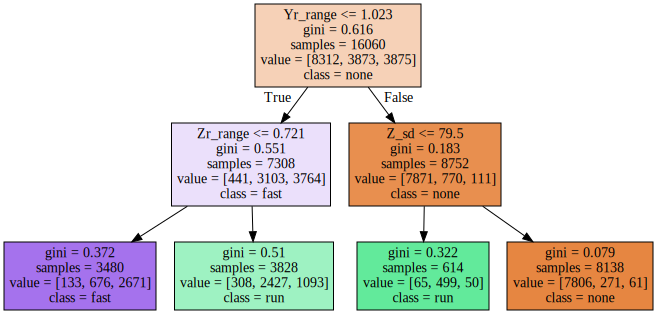

In [401]:
from sklearn.tree import export_graphviz
import graphviz
ans = ['none', 'run', 'fast', 'slow']
colnames = ['X_avg', 'Y_avg', 'Z_avg', 'Xr_avg', 'Yr_avg', 'Zr_avg', 
            'X_sd', 'Y_sd', 'Z_sd', 'Xr_sd', 'Yr_sd', 'Zr_sd', 
            'X_range', 'Y_range', 'Z_range', 'Xr_range', 'Yr_range', 'Zr_range']
g = export_graphviz(clf, 
                    feature_names=colnames,
                    class_names=ans,
                    filled=True)
graphviz.Source(g)

In [402]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()
p = {
    'n_estimators': range(10, 100),
    'max_depth': range(5, 10)
}
grid = GridSearchCV(clf, p, cv = 10, n_jobs = 8)
grid.fit(x_train, y_train)
grid.best_params_
n_estimators = dict(grid.best_params_)['max_depth']
max_depth = dict(grid.best_params_)['n_estimators']
print("'max_depth': {}, \n'n_estimators': {}".format(n_estimators, max_depth))

{'max_depth': 9, 'n_estimators': 74}

In [431]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np
clf = RandomForestClassifier(n_estimators = n_estimators,
                             max_depth = max_depth)

In [426]:
s = cross_val_score(clf, x_train, y_train, cv = 10)
print('十次分數: ', s)
print('平均: ', np.average(s))

十次分數:  [0.93905473 0.93221393 0.94835096 0.94769614 0.92963885 0.93956386
 0.93146417 0.9364486  0.93894081 0.93520249]
平均:  0.9378574552714654


In [424]:
s = cross_val_score(clf, x_test, y_test, cv = 10)
print('十次分數: ', s)
print('平均: ', np.average(s))

十次分數:  [0.95530726 0.93296089 0.9273743  0.91061453 0.94413408 0.92696629
 0.94382022 0.93258427 0.87640449 0.90449438]
平均:  0.9254660724373862


In [443]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=74, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [444]:
from sklearn.externals import joblib
joblib.dump(clf, 'model.pkl',protocol=2)   

['model.pkl']

In [439]:
y_train.iloc[0]

2